In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from mls_scf_tools.mls_pint import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]
# fmt: on

In [2]:
import pint

In [3]:
plt.style.use("bmh")
plt.rcParams.update(
    {
        "font.size": 12,
        "figure.figsize": (8, 6),
        "xtick.minor.visible": True,
        "ytick.minor.visible": True,
    }
)
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':12})
# rc('text', usetex=True)

In [4]:
%autoreload 2
import dualpy as dp


def myseed(x, name):
    return dp.seed(x, name)

# Do a fairly kinematic calculation

In [5]:
tv = np.linspace(0, 60, 61) * ureg.s
uv = 10.0 * ureg.m / ureg.s
av = 5.0 * ureg.m / ureg.s**2

t = myseed(tv, "t")
# t = tv
u = myseed(uv, "u")
# u = uv
a = myseed(av, "a")
# a = av

In [6]:
print(t.jacobians)

{'t': Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is <class 'numpy.ndarray'>([61], dtype=float64)}


In [7]:
# t = dp.seed(tv, "t")
# t = t.to(ureg.min)
# u = u.to(ureg.imperial.mile/ureg.hour)
# j = t.jacobians["t"]
# jv = j.diagonal()[0]
# print (f"Seed value has become {jv}")
# print (f"ureg are {j.dependent_unit} by {j.independent_unit}")

In [8]:
s = u * t + 0.5 * a * t**2
v = u + a * t

In [9]:
s = s.to_base_units()
i = -1
J = s.jacobians["t"]
vAna = J.extract_diagonal().to_base_units()
print(J.dependent_unit, " by ", J.independent_unit)
print(f"At t={t[i]}, s={s[i]}, v={v[i].to_base_units()}, vAna={vAna[i]}")

meter  by  second
At t=60.0 second, s=9600.0 meter, v=310.0 meter / second, vAna=310.0 meter / second


In [10]:
print(t)
print(t.jacobians["t"])

[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0] second
Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is <class 'numpy.ndarray'>([61], dtype=float64)


In [11]:
print(s)
print(s.jacobians["t"])

[0.0 12.5 30.0 52.5 80.0 112.5 150.0 192.5 240.0 292.5 350.0 412.5 480.0 552.5 630.0 712.5 800.0 892.5 990.0 1092.5 1200.0 1312.5 1430.0 1552.5 1680.0 1812.5 1950.0 2092.5 2240.0 2392.5 2550.0 2712.5 2880.0 3052.5 3230.0 3412.5 3600.0 3792.5 3990.0 4192.5 4400.0 4612.5 4830.0 5052.5 5280.0 5512.5 5750.0 5992.5 6240.0 6492.5 6750.0 7012.5 7280.0 7552.5 7830.0 8112.5 8400.0 8692.5 8990.0 9292.5 9600.0] meter
Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<meter>/d<second> = <meter / second>
data is <class 'numpy.ndarray'>([61], dtype=float64)


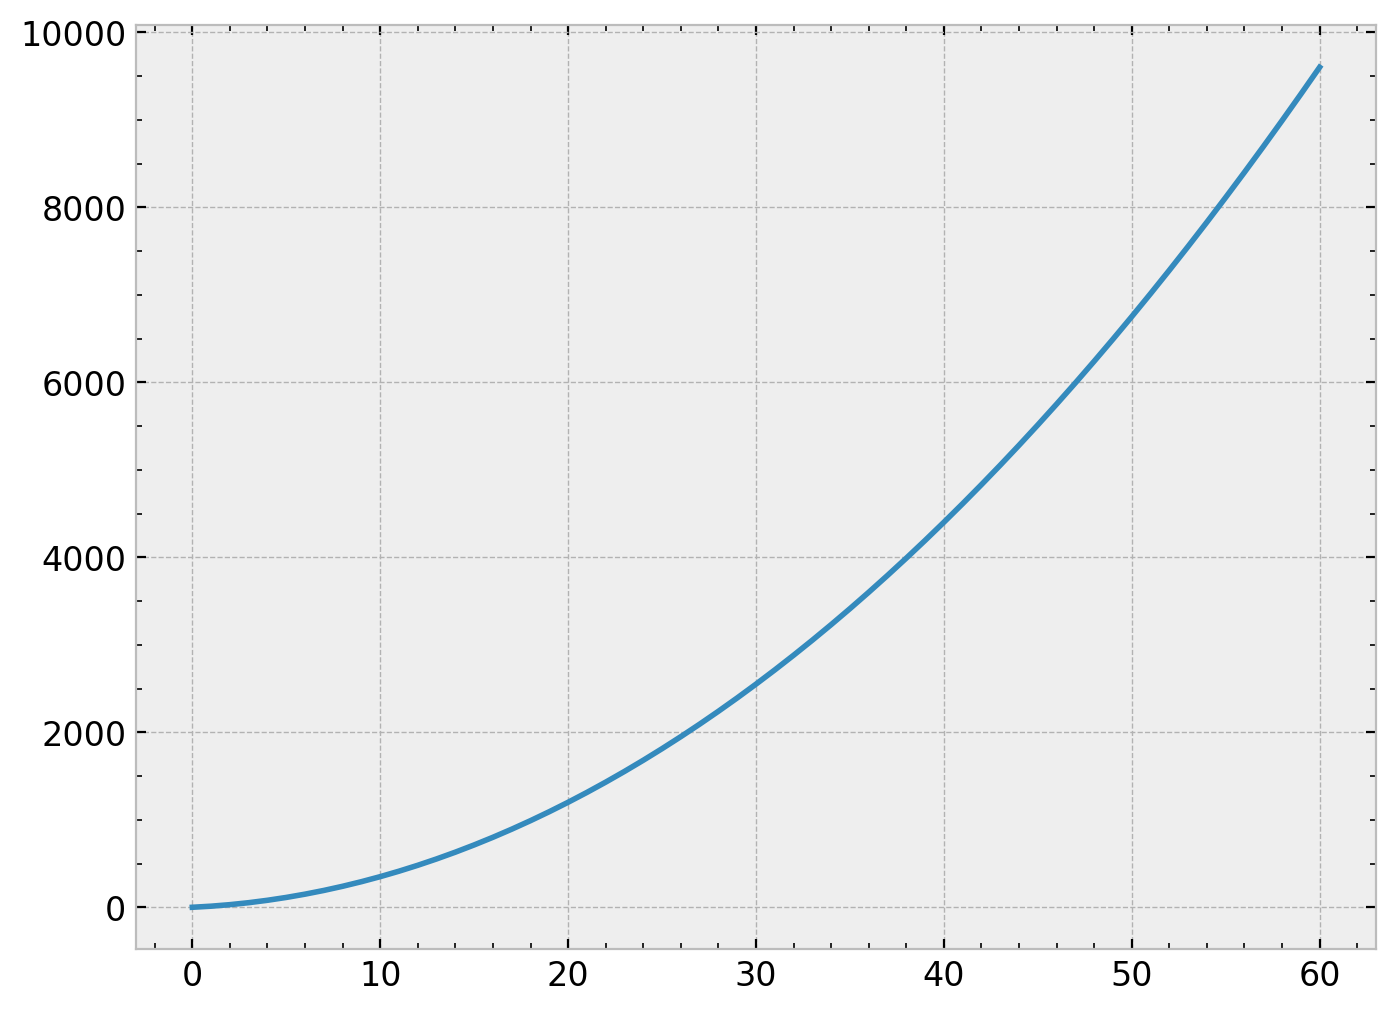

In [13]:
plt.plot(t, s)
plt.show()

## Now some oscillation / trigonometry stuff

In [15]:
theta = 30.0 * ureg.deg
# theta = theta.to(ureg.rad)
theta = myseed(theta, "theta")
s = np.sin(theta)
j = s.jacobians["theta"].extract_diagonal().to_base_units()
print(f"sin is {s}, ds/dtheta={j}")

sin is 0.4999999999999999 dimensionless, ds/dtheta=0.8660254037844386 / radian


In [18]:
tv = np.linspace(0, 50, 501) * ureg.s
omegav = 0.1 * np.pi * 2 * (ureg.rad / ureg.s)
av = 10.0 * ureg.m

In [19]:
t = myseed(tv, "t")
print(t.jacobians["t"])
# t = t.to(ureg.minute)
# t = tv
omega = myseed(omegav, "omega")
# omega = omegav
a = myseed(av, "a")
# a = a.to(ureg.cm)
# a = av

Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (501,) <501>
Independent shape is (501,) <501>
Combined they are (501, 501) <251001>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is <class 'numpy.ndarray'>([501], dtype=float64)


In [21]:
phase = omega * t
print(f"Phase has ureg of {phase.units}")
x = a * np.sin(phase)

Phase has ureg of radian


In [22]:
xa = x.jacobians["a"]
sa = a.jacobians["a"]
print(sa.independent_shape)
print(xa.independent_shape)

()
()


In [24]:
v = x.jacobians["t"].extract_diagonal()
print(f"v[0] = {v[0]}")
print(v.units)
v = v.to(ureg.m / ureg.s)
x = x.to(ureg.m)

v[0] = 6.283185307179586 meter / second
meter / second


(501, 501)


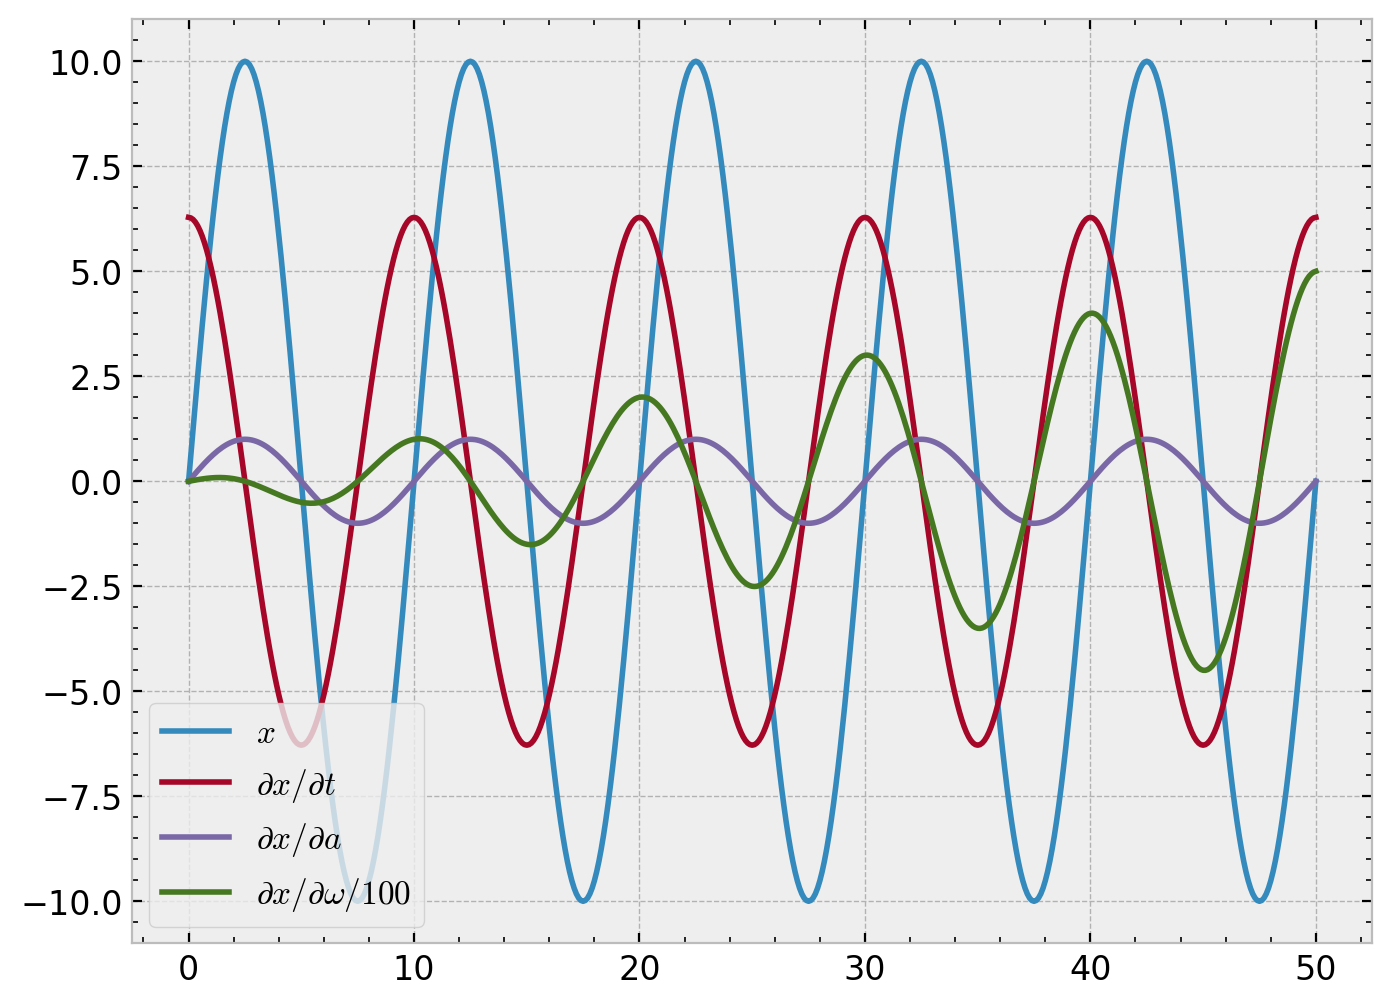

AttributeError: Neither Quantity object nor its magnitude ([ 6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01  3.84734139e-16 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5.08320369e+00 -4.84127749e+00 -4.58024497e+00 -4.30113632e+00
 -4.00505305e+00 -3.69316366e+00 -3.36669905e+00 -3.02694761e+00
 -2.67525019e+00 -2.31299478e+00 -1.94161104e+00 -1.56256465e+00
 -1.17735152e+00 -7.87491932e-01 -3.94524470e-01 -1.15420242e-15
  3.94524470e-01  7.87491932e-01  1.17735152e+00  1.56256465e+00
  1.94161104e+00  2.31299478e+00  2.67525019e+00  3.02694761e+00
  3.36669905e+00  3.69316366e+00  4.00505305e+00  4.30113632e+00
  4.58024497e+00  4.84127749e+00  5.08320369e+00  5.30506882e+00
  5.50599726e+00  5.68519604e+00  5.84195796e+00  5.97566433e+00
  6.08578749e+00  6.17189282e+00  6.23364051e+00  6.27078688e+00
  6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01  1.92367069e-15 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5.08320369e+00 -4.84127749e+00 -4.58024497e+00 -4.30113632e+00
 -4.00505305e+00 -3.69316366e+00 -3.36669905e+00 -3.02694761e+00
 -2.67525019e+00 -2.31299478e+00 -1.94161104e+00 -1.56256465e+00
 -1.17735152e+00 -7.87491932e-01 -3.94524470e-01 -2.69313897e-15
  3.94524470e-01  7.87491932e-01  1.17735152e+00  1.56256465e+00
  1.94161104e+00  2.31299478e+00  2.67525019e+00  3.02694761e+00
  3.36669905e+00  3.69316366e+00  4.00505305e+00  4.30113632e+00
  4.58024497e+00  4.84127749e+00  5.08320369e+00  5.30506882e+00
  5.50599726e+00  5.68519604e+00  5.84195796e+00  5.97566433e+00
  6.08578749e+00  6.17189282e+00  6.23364051e+00  6.27078688e+00
  6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01  3.46260725e-15 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5.08320369e+00 -4.84127749e+00 -4.58024497e+00 -4.30113632e+00
 -4.00505305e+00 -3.69316366e+00 -3.36669905e+00 -3.02694761e+00
 -2.67525019e+00 -2.31299478e+00 -1.94161104e+00 -1.56256465e+00
 -1.17735152e+00 -7.87491932e-01 -3.94524470e-01 -1.53932547e-14
  3.94524470e-01  7.87491932e-01  1.17735152e+00  1.56256465e+00
  1.94161104e+00  2.31299478e+00  2.67525019e+00  3.02694761e+00
  3.36669905e+00  3.69316366e+00  4.00505305e+00  4.30113632e+00
  4.58024497e+00  4.84127749e+00  5.08320369e+00  5.30506882e+00
  5.50599726e+00  5.68519604e+00  5.84195796e+00  5.97566433e+00
  6.08578749e+00  6.17189282e+00  6.23364051e+00  6.27078688e+00
  6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01 -6.15963539e-15 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5.08320369e+00 -4.84127749e+00 -4.58024497e+00 -4.30113632e+00
 -4.00505305e+00 -3.69316366e+00 -3.36669905e+00 -3.02694761e+00
 -2.67525019e+00 -2.31299478e+00 -1.94161104e+00 -1.56256465e+00
 -1.17735152e+00 -7.87491932e-01 -3.94524470e-01 -1.69321913e-14
  3.94524470e-01  7.87491932e-01  1.17735152e+00  1.56256465e+00
  1.94161104e+00  2.31299478e+00  2.67525019e+00  3.02694761e+00
  3.36669905e+00  3.69316366e+00  4.00505305e+00  4.30113632e+00
  4.58024497e+00  4.84127749e+00  5.08320369e+00  5.30506882e+00
  5.50599726e+00  5.68519604e+00  5.84195796e+00  5.97566433e+00
  6.08578749e+00  6.17189282e+00  6.23364051e+00  6.27078688e+00
  6.28318531e+00  6.27078688e+00  6.23364051e+00  6.17189282e+00
  6.08578749e+00  5.97566433e+00  5.84195796e+00  5.68519604e+00
  5.50599726e+00  5.30506882e+00  5.08320369e+00  4.84127749e+00
  4.58024497e+00  4.30113632e+00  4.00505305e+00  3.69316366e+00
  3.36669905e+00  3.02694761e+00  2.67525019e+00  2.31299478e+00
  1.94161104e+00  1.56256465e+00  1.17735152e+00  7.87491932e-01
  3.94524470e-01 -4.62069883e-15 -3.94524470e-01 -7.87491932e-01
 -1.17735152e+00 -1.56256465e+00 -1.94161104e+00 -2.31299478e+00
 -2.67525019e+00 -3.02694761e+00 -3.36669905e+00 -3.69316366e+00
 -4.00505305e+00 -4.30113632e+00 -4.58024497e+00 -4.84127749e+00
 -5.08320369e+00 -5.30506882e+00 -5.50599726e+00 -5.68519604e+00
 -5.84195796e+00 -5.97566433e+00 -6.08578749e+00 -6.17189282e+00
 -6.23364051e+00 -6.27078688e+00 -6.28318531e+00 -6.27078688e+00
 -6.23364051e+00 -6.17189282e+00 -6.08578749e+00 -5.97566433e+00
 -5.84195796e+00 -5.68519604e+00 -5.50599726e+00 -5.30506882e+00
 -5.08320369e+00 -4.84127749e+00 -4.58024497e+00 -4.30113632e+00
 -4.00505305e+00 -3.69316366e+00 -3.36669905e+00 -3.02694761e+00
 -2.67525019e+00 -2.31299478e+00 -1.94161104e+00 -1.56256465e+00
 -1.17735152e+00 -7.87491932e-01 -3.94524470e-01 -1.84711278e-14
  3.94524470e-01  7.87491932e-01  1.17735152e+00  1.56256465e+00
  1.94161104e+00  2.31299478e+00  2.67525019e+00  3.02694761e+00
  3.36669905e+00  3.69316366e+00  4.00505305e+00  4.30113632e+00
  4.58024497e+00  4.84127749e+00  5.08320369e+00  5.30506882e+00
  5.50599726e+00  5.68519604e+00  5.84195796e+00  5.97566433e+00
  6.08578749e+00  6.17189282e+00  6.23364051e+00  6.27078688e+00
  6.28318531e+00]) has attribute 'unit'

In [30]:
plt.plot(t,x.magnitude, label='$x$')
plt.plot(t,v.magnitude, label='$\partial x/\partial t$')
print (x.jacobians["t"].shape)
dxda = x.jacobians["a"].todensearray()
plt.plot(t,dxda.magnitude, label='$\partial x/\partial a$')
dxdomega = x.jacobians["omega"].todensearray()
plt.plot(t,(dxdomega/100).magnitude, label='$\partial x/\partial\omega/100$')
plt.legend()
plt.show()
print (type(v.unit))

In [32]:
for name, j in x.jacobians.items():
    print(f"{name} is in {j.dependent_unit} by {j.independent_unit}")
    # values = np.array(j.data) << j.unit
    # print (f"{name}={values}")

a is in meter by meter
omega is in meter by radian / second
t is in meter by second


In [36]:
xV = 0.5 * ureg.dimensionless
x = myseed(xV, "x")
print(np.arcsin(x).to(ureg.deg))

30.000000000000004 degree


In [37]:
def func(x):
    return np.sqrt(x)


xV = np.linspace(1, 10, 201) * ureg.dimensionless
x = myseed(xV, "x")
y = func(x)
jA = y.jacobians["x"].extract_diagonal()

In [40]:
print(jA)

[0.5 0.4891159880445185 0.47891314261057566 0.469323254463932 0.46028730894916176 0.45175395145262565 0.44367825470805694 0.4360207201969473 0.42874646285627216 0.4218245406095978 0.41522739926869984 0.4089304100547653 0.4029114820126901 0.3971507353947688 0.39163022499397865 0.3863337046431279 0.3812464258315117 0.3763549647474907 0.37164707312358314 0.3671115491071762 0.36273812505500586 0.35851736969103737 0.3544406025041679 0.3504998186163908 0.3466876226407682 0.34299717028501764 0.3394221166510653 0.3359565703416979 0.3325950526188697 0.3293324609693921 0.3261640365267211 0.32308533487561925 0.32009219983223997 0.3171807398477756 0.3143473067309657 0.3115884764248779 0.30890103160760773 0.30628194591584446 0.3037283696153935 0.30123761656438897 0.2988071523335984 0.2964345833643761 0.29411764705882354 0.2918542027088895 0.28964222318174615 0.2874797872880345 0.2853650727676748 0.28329634983503676 0.281271975231506 0.2792903867389728 0.2773500981126146 0.27544969439561984 0.273587

In [38]:
dx = 1e-9 * xV[-1]
jN = (func(xV + dx) - func(xV)) / dx

In [49]:
type(jA), jA.shape

(pint.Quantity, (201,))

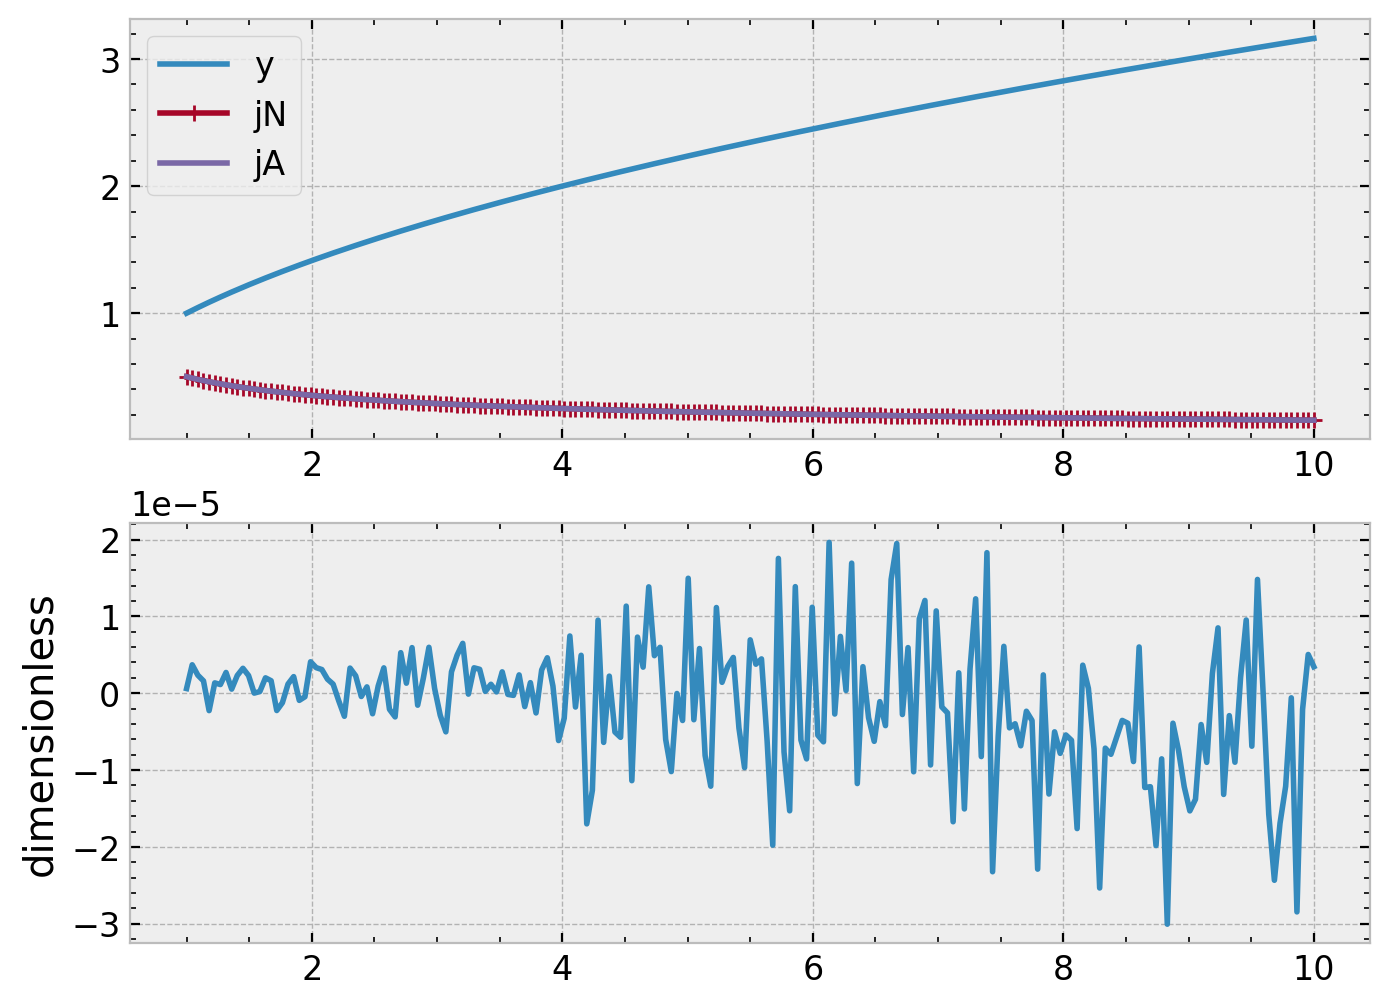

In [55]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, y, label="y")
ax1.plot(x, jN.magnitude, marker="+", label="jN")
ax1.plot(x, jA.magnitude, label="jA")
ax2.plot(x, 100.0 * (jA - jN) / jA)
ax1.legend()
plt.show()